# Data Prepocessing Lab
To build a proper machine learning model we need clean data. However, almost all the datasets are dirty due to noise, outliers. It is also important to know the data to use the appropriate machine learning algorithm. Thus, in this exercise, we will try to explore the data, clean the data, find
insights, and finally apply machine learning models.
There are so many data cleaning techniques, however, we will only focus on the most basic operations
There are some questions prepared for you to answer. Please double click on those cells and answer them.
Check out this video (From 4:30 seconds) to learn how to use Jupyter Notebook more efficiently.
You can also use google colab as well. It is a free online platform provided by Google to execute ipynb files. You don't have to install anything in your local machine. You just need an internet connection and you are ready to go. A short youtube survey will help you to understand all the basic
usage of Google Colab.

**Let's Go**

**Titanic Dataset**
Some notes for the dataset.

**Feature Names**

**pclass**: A proxy for socio-economic status (SES)

1 = Upper

2 = Middle

3 = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way Sibling and Spouse.
parch: The dataset defines family relations in this way... Parent and Child. Some children travelled only with a nanny, therefore parch=0 for them.
Our Task is to explore the data, clean it properly to feed in the machine learning model and finally predict if a passenger has survived or not, utilizing the best predictive model.
Contents:
1. Read In and Explore the Data
2. Data Analysis
3. Data Visualization
4. Cleaning Data
5. Train Machine Learning Models
6. Choosing the Best Model
 # Part I
1) Import Necessary Libraries
The first thing you have to do is to import necessary modules.

In [ ]:
#data analysis libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

**2) Read in and Explore the Data**

It's time to read in our training and testing data using pd.read_csv

In [ ]:
#import the dataset (CSV file)
train = pd.read_csv("/content/sample_data/trainDataset.csv")

**3) Data Analysis**

We will try to observe some key insights of the data

In [ ]:
"""The very first thing we should look at the features of the dataset. The column names are the features of a dataset"""
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
"""Each row of the dataset indicates an observation. It means each row provides all the information of a single passenger"""
#have an overview of the data.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
163,164,0,3,"Calic, Mr. Jovo",male,17.00,0,0,315093,8.6625,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.00,0,0,54636,16.1000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
543,544,1,2,"Beane, Mr. Edward",male,32.00,1,0,2908,26.0000,NaN,S


Question: What is the difference between .head() and .sample() function ? Hint: Check Pandas Documentation

**Numerical Features**: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

**Categorical Features**: Survived, Sex, Embarked, Pclass
**Alphanumeric Features**: Ticket, Cabin
Write the data types for each feature below? (First one is done for you)

Survived: int

Pclass:

Name:

Sex:

Age:

SibSp:

Parch:

Ticket:

Fare:

Cabin:

Embarked:

Now that we have an idea of what kinds of features we're working with. Lets find out how much information we can get from those features.

In [ ]:
"""To get an statitical analysis for each column, python has a function called describe. It provides the unique values,
mean, minimum and maximum values, standard deviation and so on"""
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Some Observations:
* There are a total of 891 passengers in the training set.

**Question**: There are a total of 714 values for Age feature in the training set. What is the percentage of missing values in Age column?

**Answer**:
Age feature is pretty important to survival, so we should probably attempt to fill these gaps.

**Question**: What is the percentage of missing values in the Cabin feature.

As the percentage of the missing value for the Cabin is high, it would be hard to fill in the missing values. Thus, drop the column is a good idea.

In [ ]:


"""We can also check total how many values are missing for each feature"""
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Few Hypothesis (Initial Assumption):
* Sex: Females are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young people are more likely to survive.

# 4) Data Visualization
To see if our hypothesis is correct or not, we have to visualize the data
## Sex Feature
First one is done for you

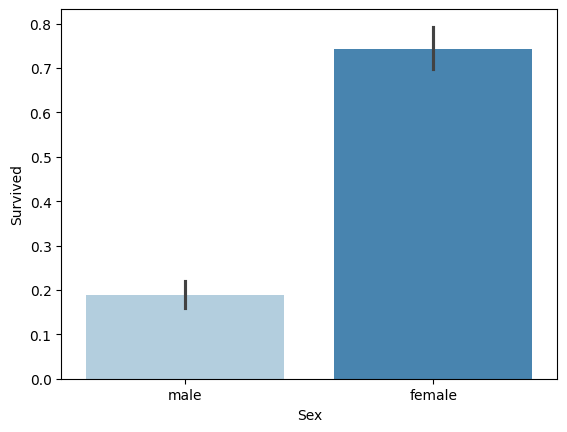

In [ ]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train, palette = "Blues")
plt.show()

**Our first hypothesis seems correct. Females have a much higher chance of survival than males.**

# Pclass Feature

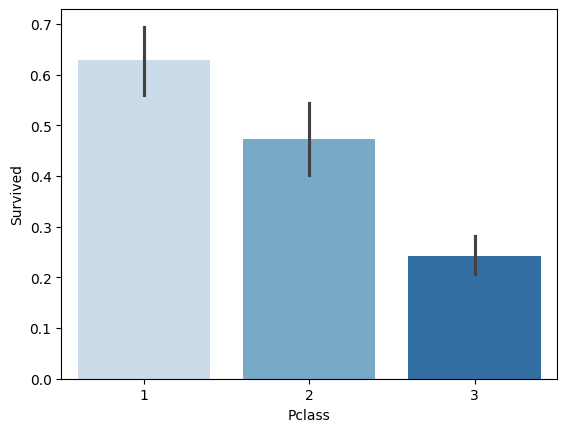

In [ ]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train, palette = "Blues")
plt.show()

* Question: Write down your analysis.

# SibSp Feature

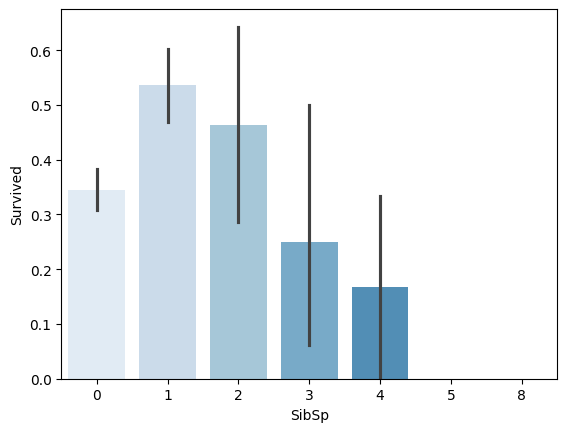

In [ ]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train, palette = "Blues")
plt.show()

* Question: Write down your analysis.*

# Parch Feature

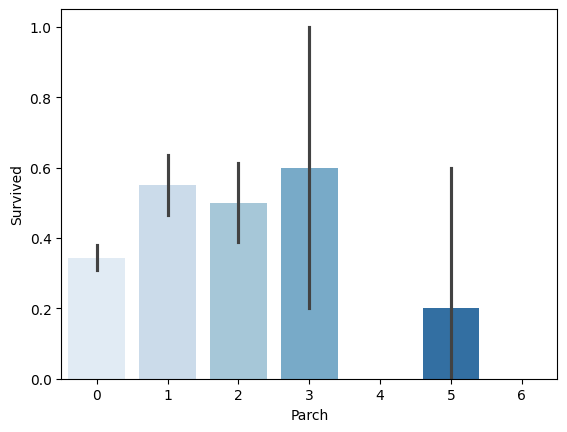

In [ ]:
#draw a bar plot for Parch vs. survival (Parch means having parents or children)
sns.barplot(x="Parch", y="Survived", data=train, palette = "Blues") # you can play with parameters to visualize more nicely.
plt.show()

* Question: Analyze the above bar graph and draw your conclusion.

# Age Feature
Here we have created a list that holds the range of passengers ages. According to the range, we define them as baby, child, adult etc. For instance, from any age value between 0 to 5 will be called as Age group baby.

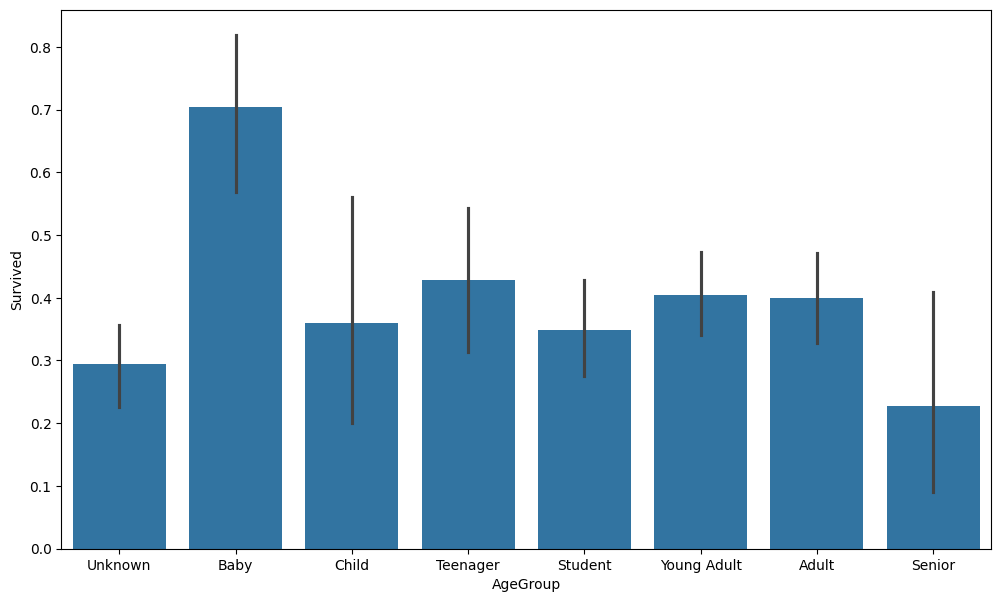

In [ ]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
#fill the missing values with -0.5 and defining them unknown. As we don't know from which Age group they belong.
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels) # Adding a feature named AgeGroup.
#draw a bar plot of Age vs. survival
plt.figure(figsize=(12,7))
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

* Question: Write down your analysis.

# Part II

** Cleaning Data **
It's time to clean the missing values and unnecessary information!
Outliers can affect the performance of the predictive model. Moreover, unnecessary data makes the model more complex and ends up making a bad predictive model. Thus, we will drop unnecessary columns and fill the missing values that are important.

# Cabin Feature


In [ ]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)

# Ticket Feature


In [ ]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)

# Embarked Feature
Embarked feature represents from where the passengers got on board. Here 'S' represents Southampton, 'C' is Cherbourg and 'Q' is Queenstown. This can be a potential feature and thus, instead of dropping, we will keep the feature and fill up the missing values.

In [ ]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)
print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)
print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


The majority of people embarked in Southampton (S). It's a good practice to fill in the missing values with the most occurances when the number of missing values are few. But it differs depending on the situation. So, lets replace the missing embarked values with "S"

In [ ]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

# Age Feature
A higher percentage of values are missing for the age feature. However, it would be illogical to fill all of them with the same value. Instead, we'll try to find a way to predict the missing ages.

In [ ]:
#create a list to loop through all the values of the dataset
combine = [train]
"""First we will create another feature called Title and extract titles from the Name column. The following code snippet shows
how to extract or parse some portion of a string."""
#extract a title for each Name in the dataset
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    pd.crosstab(train['Title'], train['Sex']) #this is how we can see the number of people holding which titles

In [ ]:
"As the unique values of the Title column are a bit larger than expected, we will replace those with more common terms."
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
#in the above line we have replaced the tiles such as Lady, Capt, Col etc with Rare.
#the following lines are doing the same for different titles
dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#this line shows the mean percentage of survived people of different titles.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


* Question  : Did all the Royal titled passengers survive?

In [ ]:
"""As machine learning model understand numeric values, thus we need to define numerical values for categorical variables"""
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
#Here we have replaced all the title values with numerical values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


Next, we'll try to predict the missing Age values from the most common age for their Title.

Now that, we have changed the titles with the numerical values, we can easily filter out age values with proper title and age group. Using only mean values to fill the age values is not a good idea. Hence, we are filtering out the age groups with their titles and retrieveing the mode value. Mode
value means the value that appears often.

In [ ]:

# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

Now that we've filled in the missing values at least somewhat accurately, it's time to map each age group to a numerical value.

**As mentioned earlier, most of the machine learning models can deal with only numerical values. Therefore, we will now transform those categorical values into numerical values and remove the features that are not worthy.**

In [ ]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,1


# Name Feature
We can drop the name feature because we've extracted the titles.

In [ ]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)

# Sex Feature

In [ ]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


# Embarked Feature

In [ ]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

# Fare Feature

In [ ]:
#drop Fare values
train = train.drop(['Fare'], axis = 1)

In [ ]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,1,4.0,1
1,2,1,1,1,1,0,2,6.0,3
2,3,1,3,1,0,0,1,5.0,2
3,4,1,1,1,1,0,1,5.0,3
4,5,0,3,0,0,0,1,5.0,1


**Question**: What differences you are observing here from the initial dataset?

**Question**: Write some other ways to change categoriacal variables into numerical ones? (Hint: Check scikit-learn preprocessing and encoding documentations)

# Choosing the Best Model
To construct a predictive model, we have to feed clean data to the model. Thats what we were doing in the above sections. Now, to train a model and measure the performance of the model, we will split the clean data into two parts. One part is called the training data by which we will train the model and the
other part is called the validation data by which we will measure the performance of the data. Conventionally, its better to preserve 80% of data for the training set and 20% for the validation set.
However, if you have a very large dataset such as 10 million observations, then its better to have 99% of training data and 1% of validation data. Because our target is to train the model with as much data as we can. And test the model with sufficient amount of validation data. 1% of 10 million is ten thousand
data. Which is enough of validation purpose.


## Splitting the Training Data
We will use split of our training data into training and validation set to test the accuracy of different models. Please check here to know more about the reason behind splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

Testing Different Models
Try to test the following models with the training data
Logistic Regression
Support Vector Machines
Decision Tree Classifier
Random Forest Classifier
KNN or k-Nearest Neighbors
For each model, set the model, fit it with 80% of the training data, predict for 20% of the training data and check the accuracy.

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression() #store the model into your own specified variable. Now logreg is a logistic regression model.
logreg.fit(x_train, y_train) #train the model with the training data.
y_pred = logreg.predict(x_val) #predict the value of the validation data
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2) #Compare the predicted value with the true value to get the accuracy.
print(acc_logreg)

77.65


It is very hard to choose a single machine learning model instantly. It depends on the dataset and what you want to do with. Thus, it is a better practice to check different algorithms and finally select the best fitted one.

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.68


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

77.65


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.33


In [ ]:
#KNN or K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

83.24


In [ ]:
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
'Random Forest', 'Decision Tree'],
'Score': [acc_svc, acc_knn, acc_logreg,
acc_randomforest, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,83.24
0,Support Vector Machines,82.68
3,Random Forest,79.33
2,Logistic Regression,77.65
4,Decision Tree,77.65
